In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

import random

import gc

%matplotlib inline

In [2]:
import sklearn

In [3]:
sklearn.__version__sion__

'0.22.1'

In [4]:
from sklearn.manifold import TSNE

# 获取训练好的模型的Embedding层

In [5]:
!ls

anchor_list.csv     model3.model		 user_category.csv
buildModel.ipynb    model_d30_interrupted.model  userInfos.csv
Inspect Data.ipynb  train.csv			 x.csv
item2vec.py	    training.ipynb
knnDemo.ipynb	    t-SNE Visualization.ipynb


In [6]:
model = keras.models.load_model('model_d30_interrupted.model')

In [122]:
X.shape

(15471, 30)

In [7]:
X = model.layers[2].embeddings.numpy()

# 使用t-SNE训练得到二维表示

In [13]:
def metric(x, y):
    return -x.dot(y) / np.sqrt(x.dot(x)) / np.sqrt(y.dot(y)) + 1
#     return 

starts from 18:48

In [17]:
tsne_result = TSNE(n_components=2, metric=metric, n_jobs=-1).fit_transform(X)

# 画图

In [18]:
tsneDF = pd.DataFrame(tsne_result, columns=['x','y'])

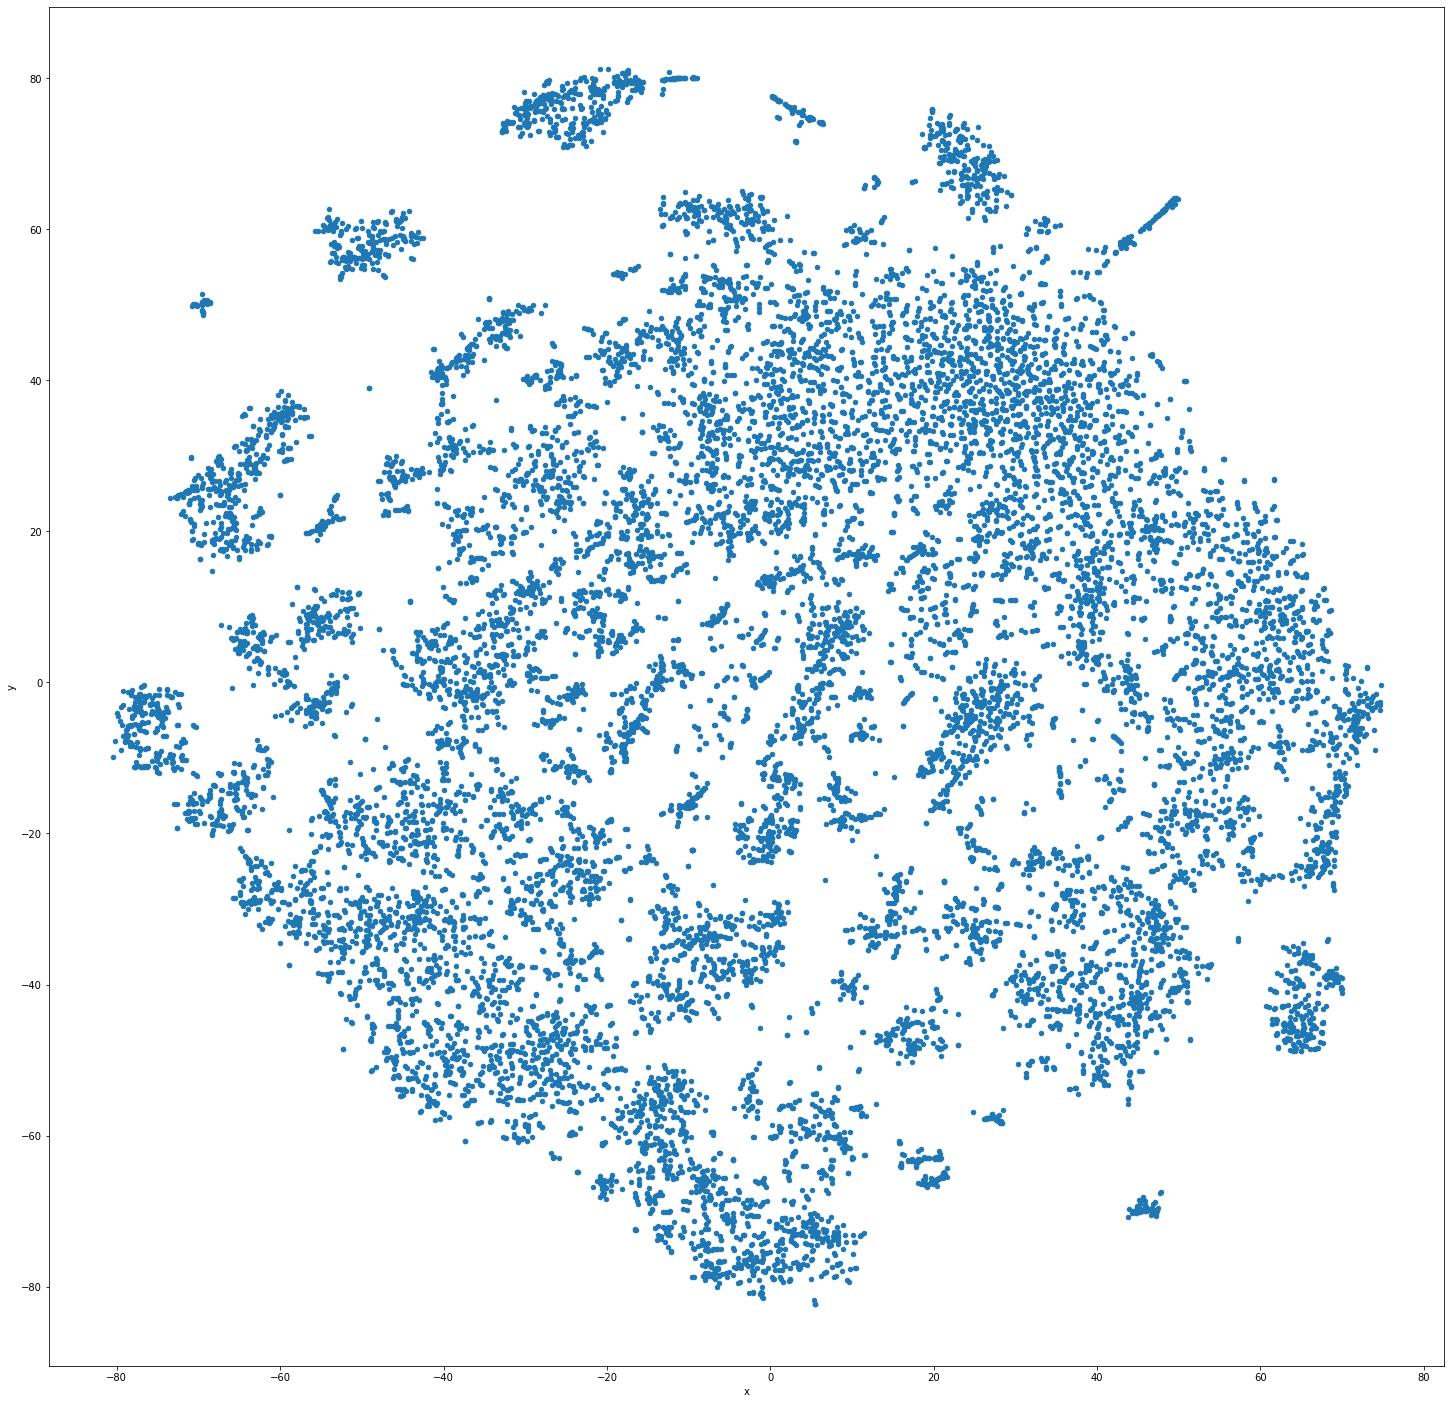

In [47]:
tsneDF.plot.scatter('x','y', figsize=(25,25))

# 获取用户其他信息用于着色

In [20]:
anchor_list = pd.read_csv('anchor_list.csv')

In [21]:
anchor_list = anchor_list.reset_index()

In [22]:
anchor_list['index'] = anchor_list['index'] + 1

In [23]:
frequent_anchor = anchor_list[anchor_list['count'] >= 10]

In [24]:
user_infos = pd.read_csv('userInfos.csv')

In [25]:
user_infos = user_infos.rename(columns={'first(category_name)':'category'})

In [26]:
user_infos

,live_uid,category,gender,city,location,age
0,107231,电台,1,北京,北京市,35
1,165170,电商,0,成都,成都市,24
2,545055,电商,0,北京,锦州市,21
3,565352,电台,0,泉州,泉州市,46
4,599726,才艺,0,包头,包头市,28
...,...,...,...,...,...,...
194963,736267875,电商,0,长沙,长沙市,30
194964,736389125,电商,1,嘉兴,嘉兴市,0
194965,736956135,户外,1,北京,北京市,-1
194966,737057579,游戏,3,平顶山,未知,-1


In [27]:
merged_data = pd.merge(frequent_anchor, user_infos, how='inner')

In [28]:
merged_data

,index,live_uid,count,category,gender,city,location,age
0,1,730183576,558593,才艺,1,北京,北京市,29
1,2,16673072,123029,才艺,0,厦门,厦门市,24
2,3,4994793,95888,才艺,1,北京,北京市,25
3,4,21678553,94230,电商,0,深圳,深圳市,39
4,5,735415548,90641,电商,3,昆明,昆明市,24
...,...,...,...,...,...,...,...,...
12096,15462,713656621,10,普通电台,0,临沂,临沂市,54
12097,15463,155468491,10,电台,0,武汉,武汉市,24
12098,15464,205071361,10,多人电台,0,宝鸡,宝鸡市,30
12099,15467,36127522,10,电台,1,莆田,莆田市,24


In [29]:
tsneDF = tsneDF.reset_index()

In [30]:
data_for_plot = pd.merge(tsneDF, merged_data, how='inner')

In [31]:
data_for_plot

,index,x,y,live_uid,count,category,gender,city,location,age
0,1,-1.459201,-55.363712,730183576,558593,才艺,1,北京,北京市,29
1,2,-2.833359,-55.513653,16673072,123029,才艺,0,厦门,厦门市,24
2,3,-2.181664,-54.070412,4994793,95888,才艺,1,北京,北京市,25
3,4,7.877108,-60.191334,21678553,94230,电商,0,深圳,深圳市,39
4,5,-50.839302,-29.246628,735415548,90641,电商,3,昆明,昆明市,24
...,...,...,...,...,...,...,...,...,...,...
12096,15462,12.184541,32.144379,713656621,10,普通电台,0,临沂,临沂市,54
12097,15463,17.247370,38.200199,155468491,10,电台,0,武汉,武汉市,24
12098,15464,66.702415,10.688980,205071361,10,多人电台,0,宝鸡,宝鸡市,30
12099,15467,59.732677,20.123178,36127522,10,电台,1,莆田,莆田市,24


In [32]:
data_for_plot['category'].unique()

array(['才艺', '电商', '普通电台', '唱歌', '钓鱼', '生活', '游戏', '宠物', '跳舞', '器乐', '男神',
       '户外', '多人电台', '美妆', '电台', '书画', '脱口秀', '口才', '荒野猎奇', '交友', '校园',
       '运动', '王者荣耀', '其他影视', '影视', '电视剧', '明星专题', '电影', '绝地求生', '才艺冷门'],
      dtype=object)

In [115]:
def age_color(age):
    if age <= 19:
        return 'red'
#     elif age <= 30:
#         return 'blue'
#     elif age <= 50:
#         return 'green'
#     elif age <= 80:
#         return 'black'
    else:
        return 'white'

In [69]:
def city_color(city):
    if city == '厦门':
        return 'red'
#     elif city == '上海':
#         return 'blue'
#     elif city == '广州':
#         return 'green'
#     elif city == '深圳':
#         return 'yellow'
    else:
        return 'white'

In [119]:
def category_color(category):
    if category == '电台':
        return 'red'
#     elif category =='唱歌':
#         return 'blue'
    else:
        return 'white'

In [93]:
def gender_color(gender):
    if gender == 0:
        return "red"
#     elif gender == 1:
#         return "red"
    else:
        return "white"

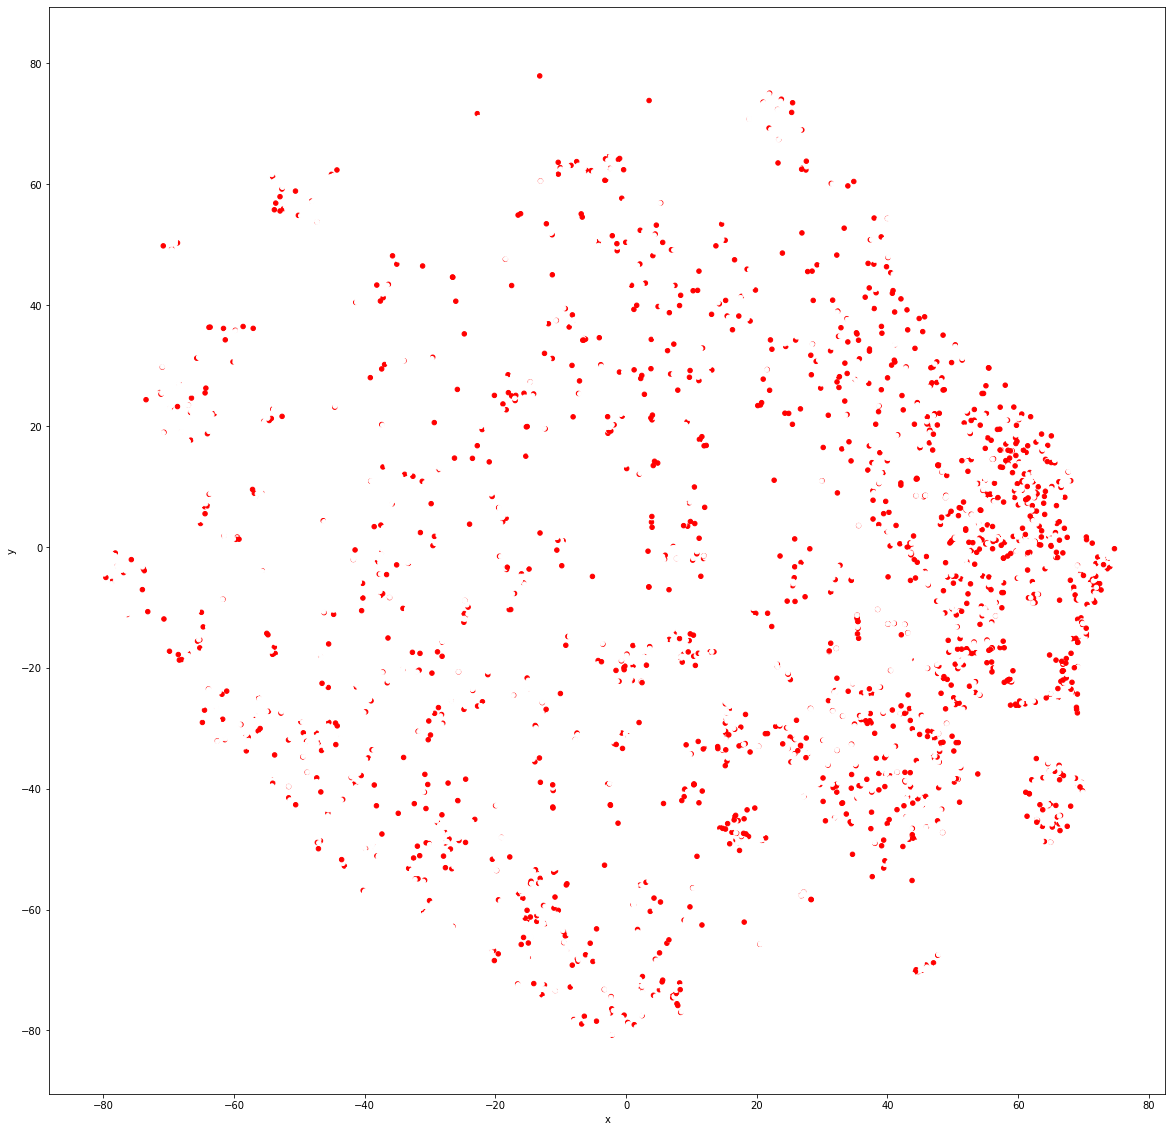

In [120]:
data_for_plot.plot.scatter(x='x', y='y', c=data_for_plot['category'].apply(category_color), figsize=(20, 20))